### Dependenices Installation

In [3]:
!pip install cmake

!git clone https://github.com/davisking/dlib.git
%cd dlib
!mkdir build
%cd build
!cmake .. -DDLIB_USE_CUDA=0 -DUSE_AVX_INSTRUCTIONS=1
!cmake --build .
%cd ..
!python setup.py install --no DLIB_USE_CUDA

Defaulting to user installation because normal site-packages is not writeable
  Using cached cmake-4.0.0-py3-none-win_amd64.whl.metadata (6.3 kB)
   ---------------------------------------- 0.0/36.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/36.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/36.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/36.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/36.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/36.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/36.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/36.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/36.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/36.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/36.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/36.7 MB ? eta -:--:--
   -----------

c:\Users\S.M.Varshit\Desktop\Varshit\IITJ\Semester 6\CV\ZzzSafe\notebooks\dlib


Cloning into 'dlib'...
Updating files:  27% (616/2275)
Updating files:  28% (637/2275)
Updating files:  29% (660/2275)
Updating files:  30% (683/2275)
Updating files:  31% (706/2275)
Updating files:  32% (728/2275)
Updating files:  33% (751/2275)
Updating files:  34% (774/2275)
Updating files:  35% (797/2275)
Updating files:  36% (819/2275)
Updating files:  37% (842/2275)
Updating files:  38% (865/2275)
Updating files:  39% (888/2275)
Updating files:  40% (910/2275)
Updating files:  41% (933/2275)
Updating files:  42% (956/2275)
Updating files:  43% (979/2275)
Updating files:  44% (1001/2275)
Updating files:  45% (1024/2275)
Updating files:  46% (1047/2275)
Updating files:  47% (1070/2275)
Updating files:  48% (1092/2275)
Updating files:  49% (1115/2275)
Updating files:  50% (1138/2275)
Updating files:  51% (1161/2275)
Updating files:  52% (1183/2275)
Updating files:  53% (1206/2275)
Updating files:  54% (1229/2275)
Updating files:  55% (1252/2275)
Updating files:  55% (1257/2275)
Upda

c:\Users\S.M.Varshit\Desktop\Varshit\IITJ\Semester 6\CV\ZzzSafe\notebooks\dlib\build
-- Building for: NMake Makefiles
-- Configuring incomplete, errors occurred!


CMake Error at CMakeLists.txt:3 (project):
  Running

   'nmake' '-?'

  failed with:

   no such file or directory


CMake Error: CMAKE_C_COMPILER not set, after EnableLanguage
CMake Error: CMAKE_CXX_COMPILER not set, after EnableLanguage


c:\Users\S.M.Varshit\Desktop\Varshit\IITJ\Semester 6\CV\ZzzSafe\notebooks\dlib


no such file or directory
CMake Error: Generator: build tool execution failed, command was: nmake -f Makefile /nologo
usage: setup.py [global_opts] cmd1 [cmd1_opts] [cmd2 [cmd2_opts] ...]
   or: setup.py --help [cmd1 cmd2 ...]
   or: setup.py --help-commands
   or: setup.py cmd --help

error: option --no DLIB_USE_CUDA not recognized


In [2]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2


'wget' is not recognized as an internal or external command,
operable program or batch file.
'bzip2' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving testimg.jpg to testimg.jpg


###Import Modules

In [ ]:
import cv2
import dlib
from scipy.spatial import distance
import numpy as np
import matplotlib.pyplot as plt



###EAR and MAR Calculation

In [ ]:
def calculate_ear(eye):
    A = distance.euclidean(eye[1], eye[5])
    B = distance.euclidean(eye[2], eye[4])
    C = distance.euclidean(eye[0], eye[3])
    ear = (A + B) / (2.0 * C)
    return ear

def calculate_mar(mouth):
    A = distance.euclidean(mouth[1], mouth[7])
    B = distance.euclidean(mouth[2], mouth[6])
    C = distance.euclidean(mouth[3], mouth[5])
    D = distance.euclidean(mouth[0], mouth[4])
    mar = (A + B + C) / (3.0 * D)
    return mar

###Face Detection

In [ ]:
face_detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

In [ ]:
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)

if image is None:
    raise ValueError("Image could not be loaded. Check file upload.")

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


###Implementation

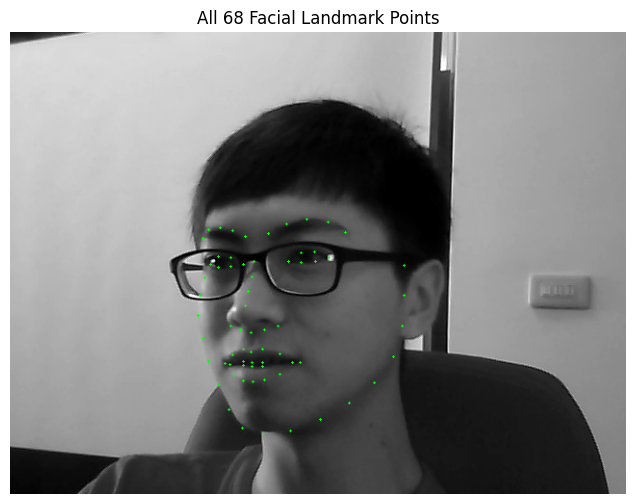

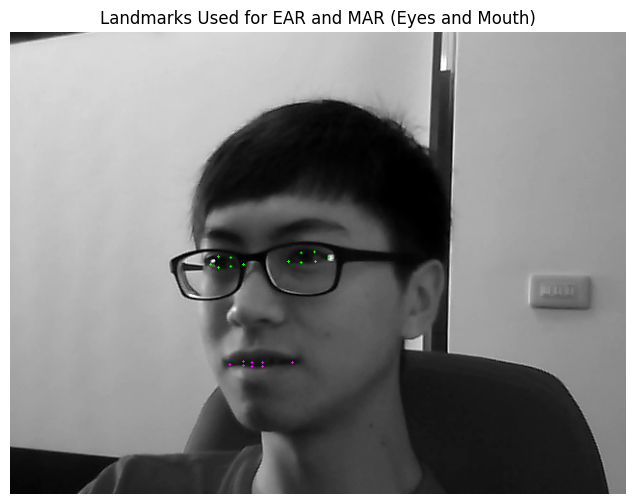

In [ ]:
faces = face_detector(gray)
if len(faces) == 0:
    print(" No face detected.")
else:
    for face in faces:
        shape = predictor(gray, face)
        shape_np = np.array([[p.x, p.y] for p in shape.parts()])

        leftEye = shape_np[42:48]
        rightEye = shape_np[36:42]
        mouth = shape_np[60:68]

        image_all_landmarks = image_rgb.copy()
        for (x, y) in shape_np:
            cv2.circle(image_all_landmarks, (x, y), 1, (0, 255, 0), -1)

        plt.figure(figsize=(10, 6))
        plt.imshow(image_all_landmarks)
        plt.axis('off')
        plt.title("All 68 Facial Landmark Points")
        plt.show()


        image_eye_mouth_only = image_rgb.copy()
        for (x, y) in np.concatenate((leftEye, rightEye)):
            cv2.circle(image_eye_mouth_only, (x, y), 1, (0, 255, 0), -1)
        for (x, y) in mouth:
            cv2.circle(image_eye_mouth_only, (x, y), 1, (255, 0, 255), -1)

        plt.figure(figsize=(10, 6))
        plt.imshow(image_eye_mouth_only)
        plt.axis('off')
        plt.title("Landmarks Used for EAR and MAR (Eyes and Mouth)")
        plt.show()

        leftEAR = calculate_ear(leftEye)
        rightEAR = calculate_ear(rightEye)
        ear = (leftEAR + rightEAR) / 2.0
        mar = calculate_mar(mouth)

        for (x, y) in np.concatenate((leftEye, rightEye)):
            cv2.circle(image_rgb, (x, y), 1, (0, 255, 0), -1)

        for (x, y) in mouth:
            cv2.circle(image_rgb, (x, y), 1, (255, 0, 255), -1)


        cv2.putText(image_rgb, f"EAR: {ear:.2f}", (10, 60),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 255, 255), 1)
        cv2.putText(image_rgb, f"MAR: {mar:.2f}", (10, 45),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 0, 255), 1)

        status = "Alert"
        if ear < 0.25 and mar > 0.6:
            status = "Drowsy + Yawning"
        elif ear < 0.25:
            status = "Drowsy"
        elif mar > 0.6:
            status = "Yawning"

        cv2.putText(image_rgb, f"Status: {status}", (10, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 0, 0), 1)

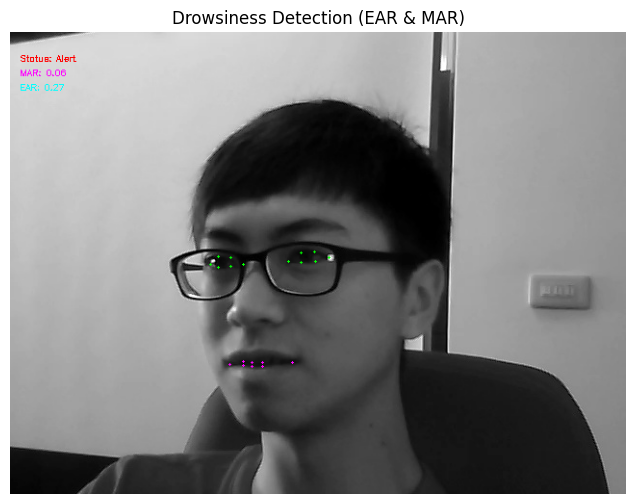

In [ ]:
# Show result
plt.figure(figsize=(10, 6))
plt.imshow(image_rgb)
plt.axis('off')
plt.title("Drowsiness Detection (EAR & MAR)")
plt.show()